In [31]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [32]:
img_path='/content/tree.jpg'
img=load_img(img_path)
img_array=img_to_array(img)

In [33]:
img_array=img_array.reshape((1,)+img_array.shape)

In [34]:
datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [35]:
augmented_images=datagen.flow(img_array,batch_size=1)

In [36]:
def visualize_augmented_images(generator,num_images):
  fig,axes=plt.subplots(1,num_images,figsize=(20,20))
  for i in range(num_images):
    batch=next(generator)
    aug_image=batch[0]
    axes[i].imshow(aug_image)
    axes[i].axis('off')
  plt.show()

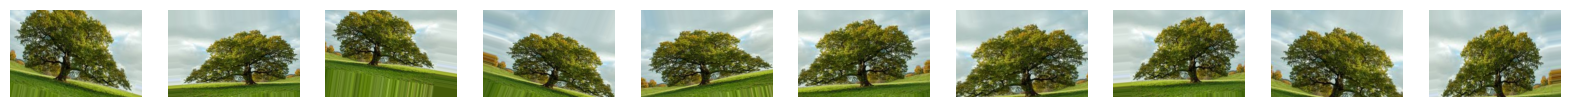

In [37]:
visualize_augmented_images(augmented_images,10)

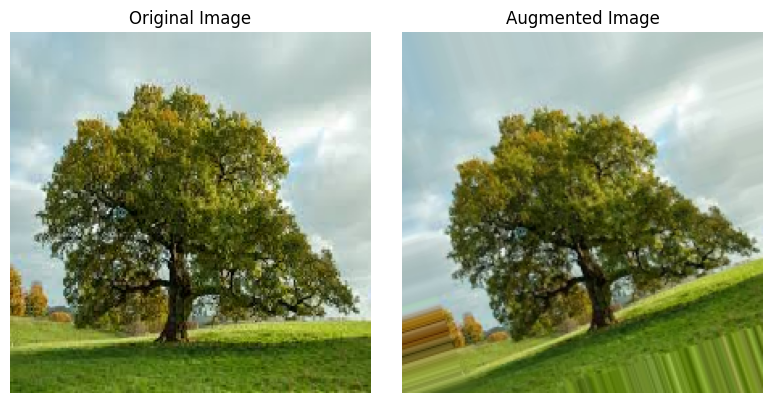

In [40]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess image
img_path = '/content/tree.jpg'  # Replace with your image path
img = load_img(img_path, target_size=(224, 224))  # Resize if needed
img_array = img_to_array(img)

# Add batch dimension
img_array_expanded = np.expand_dims(img_array, axis=0)

# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

# Generate one augmented image
augmented_iterator = datagen.flow(img_array_expanded, batch_size=1)
augmented_image = next(augmented_iterator)[0].astype('uint8')

# Plot original and augmented images side by side
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_array.astype('uint8'))
plt.title('Original Image')
plt.axis('off')

# Augmented image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title('Augmented Image')
plt.axis('off')

plt.tight_layout()
plt.show()
